# Conceptual Questions

Exercise 1)

(5 points) What is a perceptron? Be specific.

A perceptron is an artificial neuron comprised of two main components:

Input Weights (w): It takes input from multiple sources, represented as a vector (x), with each input associated with a weight (w) that signifies its importance.

Activation Function: The perceptron computes the weighted sum of inputs and weights, denoted as z = w1x1 + w2x2 + ... + wn*xn. This result is then passed through an activation function, such as a step function, to determine the output (y). The output is typically binary, like 0 or 1, based on whether the result surpasses a specified threshold.
    

Exercise 2)

(5 points) What are the different types of perceptrons? Briefly describe each of them.

Single-Layer Perceptron:

A single-layer perceptron: consists of single layer of input neurons, each connected to an output neuron.
Computes the weighted sum of inputs, followed by the application of an activation function, typically a step function. The output is binary, based on whether the computed value exceeds a threshold.

Multilayer Perceptrons (MLP):

MLPs consist of multiple layers of neurons, including an input layer, one or more hidden layers, and an output layer.

Exercise 3)
(5 points) What is a hard margin in a support vector machine model? Be specific.

The purpose of a hard margin is to maximize the space between different sets of classifications. The space between those classifications is a hard-margin.

Exercise 4
(4 points) The effectiveness of a support vector machine model depends on:

(d) All of the above

(4 points) What is/are true about kernel in SVM?

(d) (a) and (c)


In [7]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import recall_score
from sklearn.svm import SVC
from sklearn.metrics import classification_report

from tqdm import tqdm_notebook, tqdm

In [3]:
# a)
heart=pd.read_csv('framingham.csv')
heart.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
# b)
heart=heart.dropna()

In [6]:
# c)
X=heart[['age', 'currentSmoker', 'totChol', 'BMI', 'heartRate']]
y=heart['TenYearCHD']

# i)

#############
## Model 1 ##
#############

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, y, test_size=0.2)

md_1=make_pipeline(MinMaxScaler(),
                 MLPClassifier(hidden_layer_sizes=(4,),
                               activation='tanh',
                               solver = 'sgd',
                               max_iter=1000,
                               batch_size=500))
md_1.fit(X_train_1,y_train_1)
y_pred_1=md_1.predict_proba(X_test_1)[:, 1]
y_pred_label_1=np.where(y_pred_1<0.15,0,1)
md_1_recall = recall_score(y_test_1, y_pred_label_1)
print("Model 1 Recall: ", md_1_recall)

#############
## Model 2 ##
#############

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, test_size=0.2)

md_2=make_pipeline(MinMaxScaler(),
                 MLPClassifier(hidden_layer_sizes=(4,),
                               activation='relu',
                               solver = 'sgd',
                               max_iter=1000,
                               batch_size=500))
md_2.fit(X_train_2,y_train_1)
y_pred_2=md_2.predict_proba(X_test_2)[:, 1]
y_pred_label_2=np.where(y_pred_2<0.15,0,1)
md_2_recall = recall_score(y_test_2, y_pred_label_2)
print("Model 2 Recall: ", md_2_recall)

#############
## Model 3 ##
#############

X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X, y, test_size=0.2)
md_3=make_pipeline(MinMaxScaler(),
                  SVC(kernel='rbf', probability=True))
md_3.fit(X_train_3,y_train_3)
y_pred_3=md_3.predict_proba(X_test_3)[:, 1]
y_pred_label_3=np.where(y_pred_3<0.15,0,1)
md_3_recall = recall_score(y_test_3, y_pred_label_3)
print("Model 3 Recall: ", md_3_recall)

#############
## Model 4 ##
#############

X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(X, y, test_size=0.2)
md_4=make_pipeline(MinMaxScaler(),
                  SVC(kernel='poly', probability=True))
md_4.fit(X_train_4,y_train_4)
y_pred_4=md_4.predict_proba(X_test_4)[:, 1]
y_pred_label_4=np.where(y_pred_4<0.15,0,1)
md_4_recall = recall_score(y_test_4, y_pred_label_4)
print("Model 4 Recall: ", md_4_recall)

Model 1 Recall:  0.8660714285714286
Model 2 Recall:  0.9203539823008849
Model 3 Recall:  0.8468468468468469
Model 4 Recall:  0.883495145631068


100%|██████████| 100/100 [11:47<00:00,  7.07s/it]


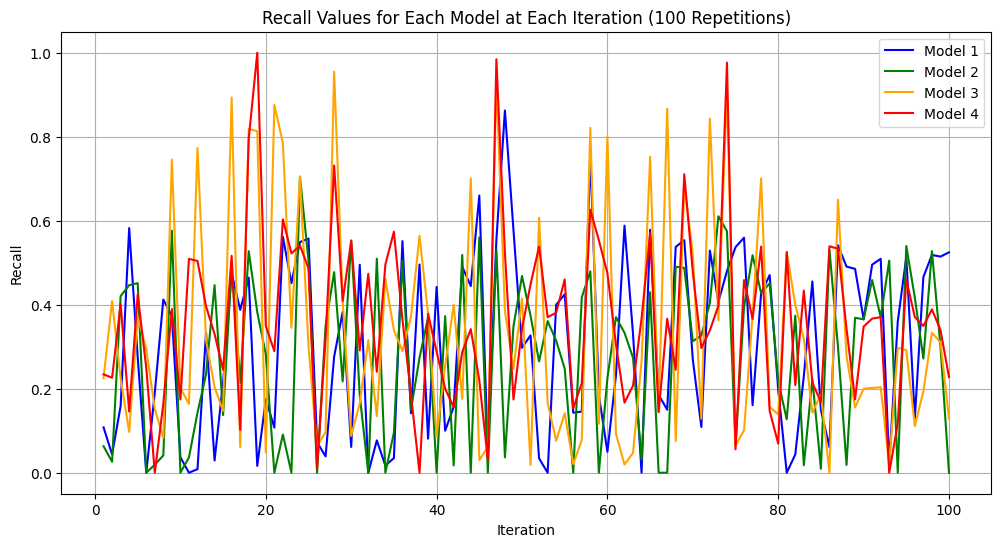

Average Recall for Model 1: 0.3051859903793499
Average Recall for Model 2: 0.2790666049451013
Average Recall for Model 3: 0.33423299256623196
Average Recall for Model 4: 0.3608458690634614


In [8]:
# d)

md_1_recall_values = []
md_2_recall_values = []
md_3_recall_values = []
md_4_recall_values = []

num_repetitions = 100

for iteration in tqdm(range(num_repetitions)):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)
    
    #############
    ## Model 1 ##
    #############
    md_1 = make_pipeline(
        MinMaxScaler(),
        MLPClassifier(hidden_layer_sizes=(4,),
                      activation='tanh',
                      solver='sgd',
                      max_iter=1000,
                      batch_size=500)
    )
    md_1.fit(X_train, y_train)
    y_pred_1 = md_1.predict_proba(X_test)[:, 1]
    y_pred_label_1 = (y_pred_1 < 0.15).astype(int)
    md_1_recall = recall_score(y_test, y_pred_label_1)
    md_1_recall_values.append(md_1_recall)

    #############
    ## Model 2 ##
    #############
    
    md_2 = make_pipeline(
        MinMaxScaler(),
        MLPClassifier(hidden_layer_sizes=(4,),
                      activation='relu',
                      solver='sgd',
                      max_iter=1000,
                      batch_size=500)
    )
    md_2.fit(X_train, y_train)
    y_pred_2 = md_2.predict_proba(X_test)[:, 1]
    y_pred_label_2 = (y_pred_2 < 0.15).astype(int)
    md_2_recall = recall_score(y_test, y_pred_label_2)
    md_2_recall_values.append(md_2_recall)

    #############
    ## Model 3 ##
    #############
    
    md_3 = make_pipeline(
        MinMaxScaler(),
        SVC(kernel='rbf', probability=True)
    )
    md_3.fit(X_train, y_train)
    y_pred_3 = md_3.predict_proba(X_test)[:, 1]
    y_pred_label_3 = (y_pred_3 < 0.15).astype(int)
    md_3_recall = recall_score(y_test, y_pred_label_3)
    md_3_recall_values.append(md_3_recall)

    #############
    ## Model 4 ##
    #############
    
    md_4 = make_pipeline(
        MinMaxScaler(),
        SVC(kernel='poly', probability=True)
    )
    md_4.fit(X_train, y_train)
    y_pred_4 = md_4.predict_proba(X_test)[:, 1]
    y_pred_label_4 = (y_pred_4 < 0.15).astype(int)
    md_4_recall = recall_score(y_test, y_pred_label_4)
    md_4_recall_values.append(md_4_recall)

plt.figure(figsize=(12, 6))
plt.plot(range(1, num_repetitions + 1), md_1_recall_values, label='Model 1', color='blue')
plt.plot(range(1, num_repetitions + 1), md_2_recall_values, label='Model 2', color='green')
plt.plot(range(1, num_repetitions + 1), md_3_recall_values, label='Model 3', color='orange')
plt.plot(range(1, num_repetitions + 1), md_4_recall_values, label='Model 4', color='red')
plt.xlabel('Iteration')
plt.ylabel('Recall')
plt.title('Recall Values for Each Model at Each Iteration (100 Repetitions)')
plt.legend()
plt.grid(True)
plt.show()

average_md_1_recall = np.mean(md_1_recall_values)
average_md_2_recall = np.mean(md_2_recall_values)
average_md_3_recall = np.mean(md_3_recall_values)
average_md_4_recall = np.mean(md_4_recall_values)

print("Average Recall for Model 1:", average_md_1_recall)
print("Average Recall for Model 2:", average_md_2_recall)
print("Average Recall for Model 3:", average_md_3_recall)
print("Average Recall for Model 4:", average_md_4_recall)

Average Recall for Model 1: 0.3051859903793499
Average Recall for Model 2: 0.2790666049451013
Average Recall for Model 3: 0.33423299256623196
Average Recall for Model 4: 0.3608458690634614

I would use model 4